# CA2 Part2: Depth from Rectified Stereo Images

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random as rm
import math
import cv2
import random
import gco

/Users/frank/anaconda3/envs/vc/lib/python3.10/site-packages/gco/__init__.py:7: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, name):


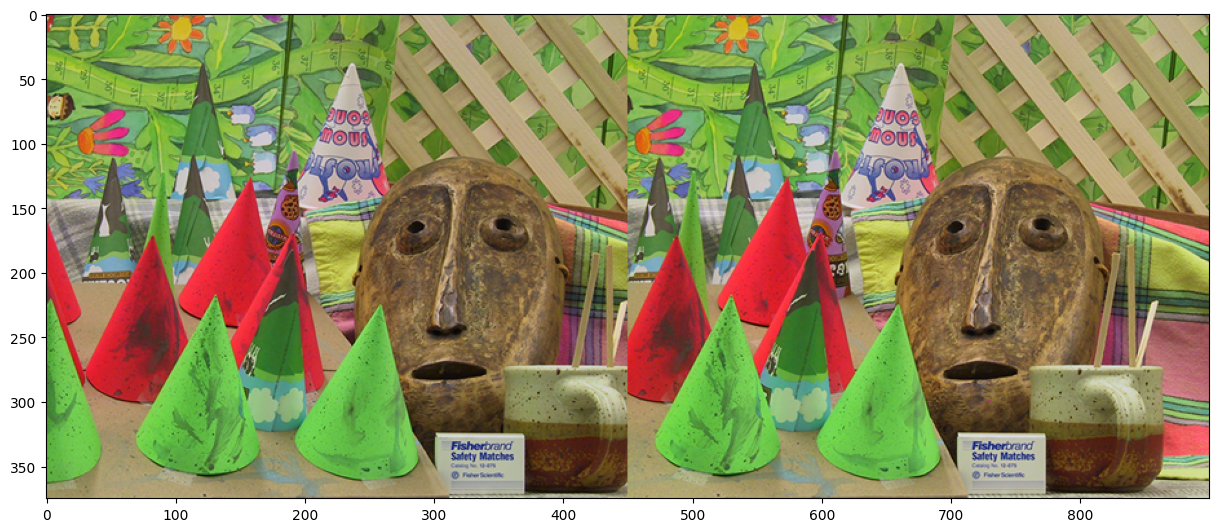

In [2]:
im1 = cv2.imread('data/im2.png',cv2.IMREAD_COLOR)
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im2 = cv2.imread('data/im6.png',cv2.IMREAD_COLOR)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)

im = np.hstack((im1,im2))
#show the original figure
plt.figure( figsize=(15,15) )
plt.imshow(im)

### distance: calculate the Euclidean distance of two pixels
### median: return the median value of a list
### mode: return the mode value of a list

In [3]:
# distance
def distance(xi,xj):
    return np.sum(np.abs(xi - xj))/3

In [4]:
def median(data):
    data.sort()
    half = len(data) // 2
    return (data[half] + data[~half])/2

In [5]:
def mode(data):
    data = list(data)
    return max(set(data),key=data.count)

## Distribution: run through all pixels in one image to get the disparity value range of two images 

In [6]:
def Ddistribution(im1,im2):
    
    size1 = im1.shape
    size2 = im2.shape
    
    if size1 != size2 : 
        raise ValueError('input shape not matches')
        
    dis_col = []
    for i in range(size1[0]):
        Dis = np.zeros(size1[1])
        for j in range(size1[1]):
            pixel = im1[i,j]
            im2_pixel = im2[i,j:]
            difference = abs(im2_pixel - pixel)
            dis = np.sum(difference,axis = 1) / 3
            disparity = np.argmin(dis)
            if dis[disparity] < 5 :
                Dis[j] = disparity
        
        disp = [p for p in Dis if p > 0]
        dis_col.append(mode(disp))
                        
    return dis_col

## nodes: generate data term accroding to the calculated disparity, the depth of D(dmax - dmin) is equal to the max value minus the min value in disparity

In [7]:
# generate nodes
def nodes(im1,im2,Disparity,depth = None):
    
    # input protection 
    size1 = im1.shape
    size2 = im2.shape
    
    if size1 != size2 : 
        raise ValueError('input shape not matches')
        
    [row,col,c] = size1
    # preprocessing: get the disparity distribution first for getting D: dmin and dmax 
#     Disparity = Ddistribution(im1,im2)
    dmin = min(Disparity) 
    dmax = max(Disparity) 
    if depth == None:
        depth = int(dmax - dmin)
    else :
        depth = int(depth)
    step = (dmax - dmin) / depth
#     print(Disparity)
    print('dmin:',dmin,'dmax',dmax)
    unary = np.zeros([row,col,depth])
    
    for x in range(0,row):
        for y in range(0,int(col - dmax)):

            # pixel color
            pixel1 = im1[x,y]
            labels = np.zeros(depth)
            
            for i in range(depth):
                
                if i < depth - 1:
                    pixel2_index_start = round(i * step + dmin)
                    pixel2_index_end = round((i+1) * step + dmin)
                elif i == depth - 1:
                    pixel2_index_start = round(i * step + dmin)
                    pixel2_index_end = int(dmax)
                
                pixel2 = im2[x,y+pixel2_index_start:y+pixel2_index_end]
                dis = []
                for p in pixel2:
                    dis.append(distance(pixel1,p))
                dis_min = min(dis)
                
                labels[i] = dis_min / 255
            
            unary[x,y] = labels
        
#         print('label computing: %.2f%%'%(x/row)*100)
    
    unary_cut = unary[:,:int(col-dmax),:] * depth
    return unary_cut, depth


## gcut: generate the prior term first, then graph cut and return label

In [8]:
# graph cut
def gcut(unary,depth,lmd):
    [row,col,c] = unary.shape
    fp = np.zeros([depth,depth])
    for i in range(depth):
        for j in range(depth):
                fp[i,j] = abs(i-j)
    labels = gco.cut_grid_graph_simple(unary, fp*lmd, connect = 8, n_iter=-1)
    labels = labels.reshape(row,col)
    labels = labels[:,depth:]
    return labels

In [9]:
Disparity = Ddistribution(im2,im1)
print(min(Disparity),max(Disparity))

unary,depth = nodes(im2,im1,Disparity)

4.0 56.0
dmin: 4.0 dmax 56.0


## set the lambda as 0.1

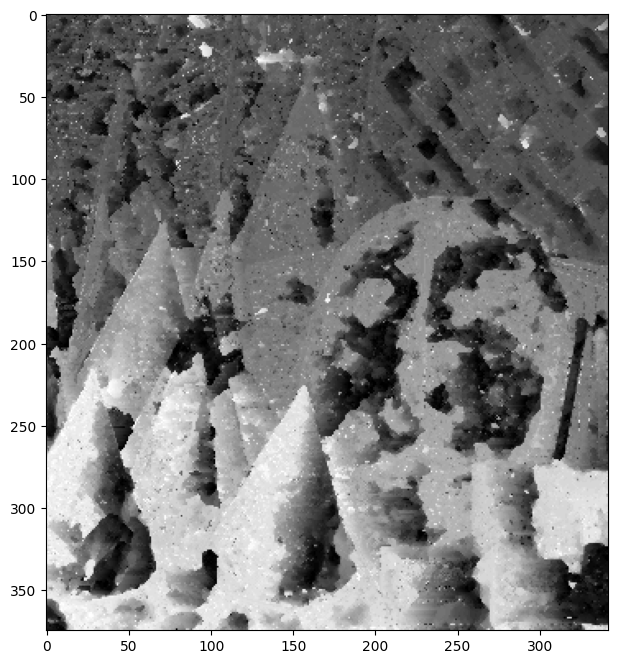

In [10]:
lmd = 0.1
labels = gcut(unary,depth,lmd)

plt.figure( figsize=(8,8) )
plt.imshow(labels,'gray')

## set the lambda as 0.2

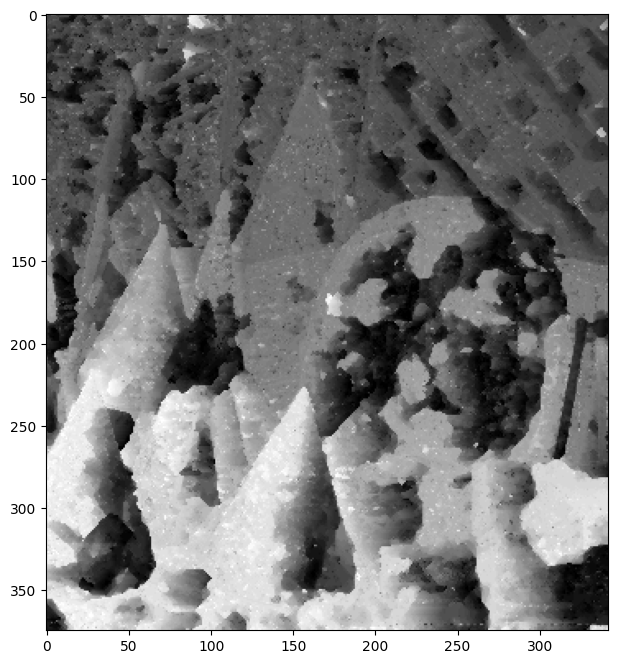

In [11]:
lmd = 0.2
labels = gcut(unary,depth,lmd)

plt.figure( figsize=(8,8) )
plt.imshow(labels,'gray')

## set the lambda as 0.4

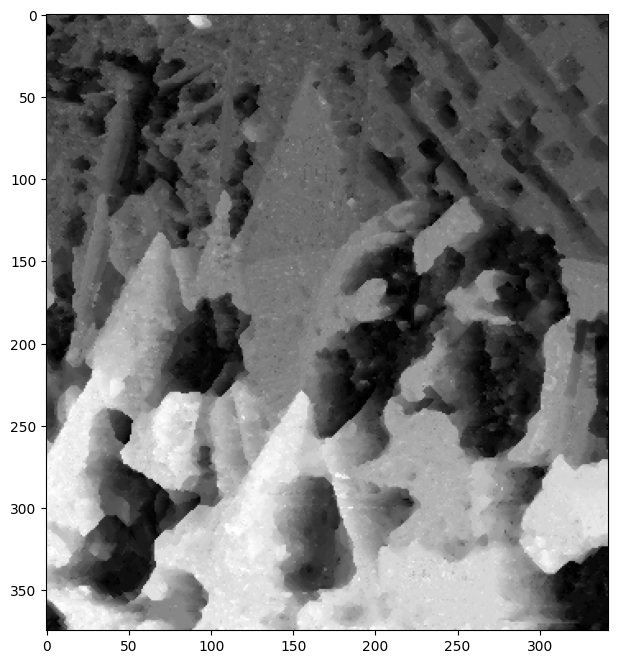

In [12]:
lmd = 0.4
labels = gcut(unary,depth,lmd)

plt.figure( figsize=(8,8) )
plt.imshow(labels,'gray')

## set the lambda as 0.5

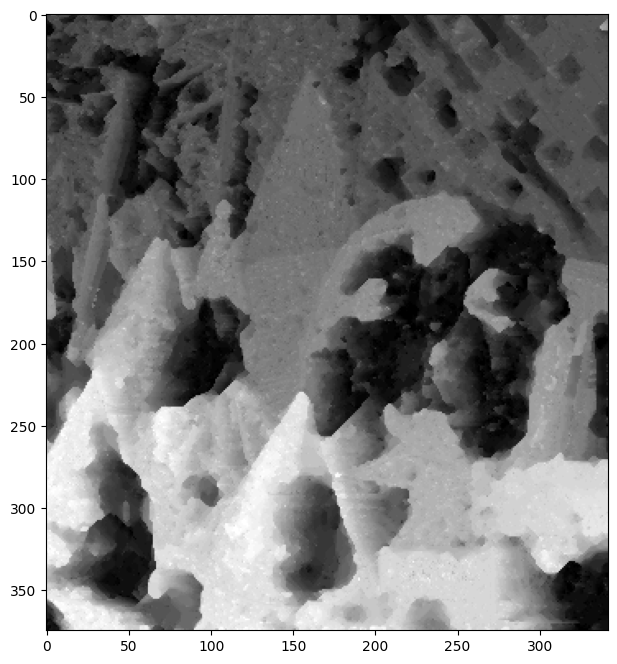

In [13]:
lmd = 0.5
labels = gcut(unary,depth,lmd)

plt.figure( figsize=(8,8) )
plt.imshow(labels,'gray')

## set the lambda as 1

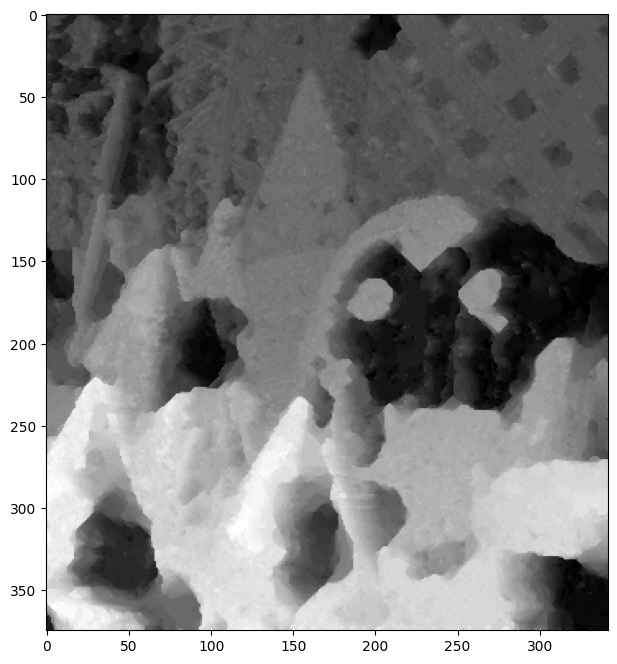

In [14]:
lmd = 1
labels = gcut(unary,depth,lmd)

plt.figure( figsize=(8,8) )
plt.imshow(labels,'gray')

## set the lambda as 2

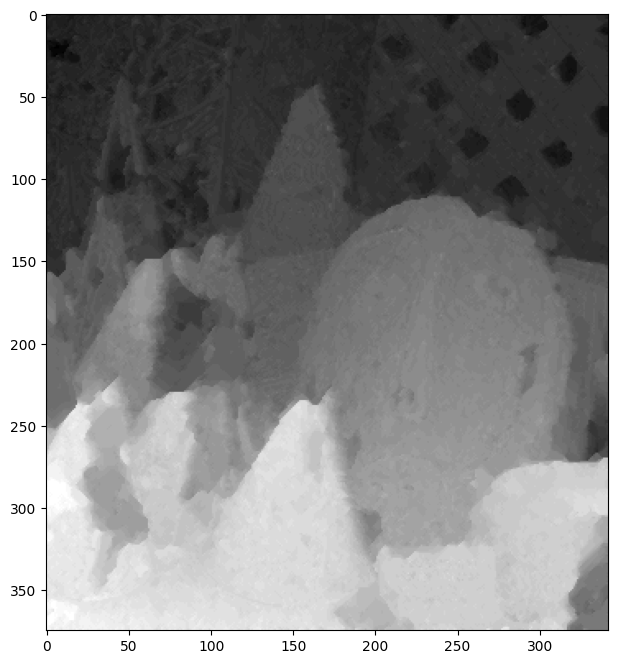

In [15]:
lmd = 2
labels = gcut(unary,depth,lmd)

plt.figure( figsize=(8,8) )
plt.imshow(labels,'gray')

## set the lambda as 3

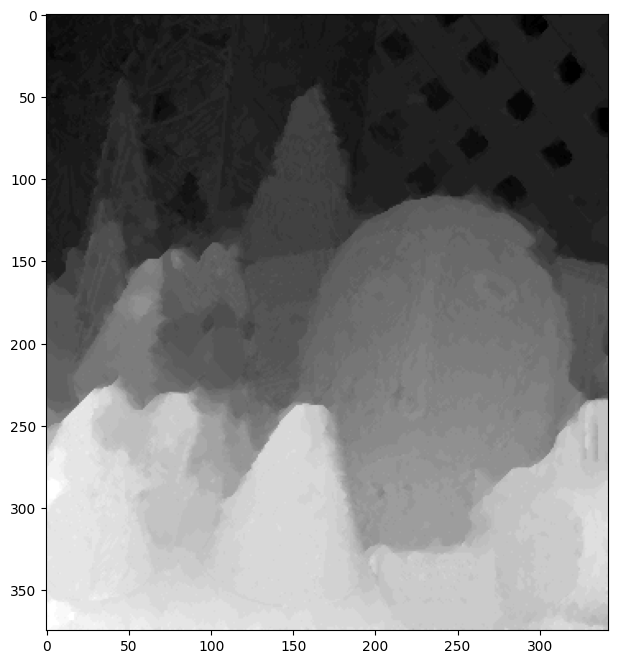

In [16]:
lmd = 3
labels = gcut(unary,depth,lmd)

plt.figure( figsize=(8,8) )
plt.imshow(labels,'gray')

## set the lambda as 4

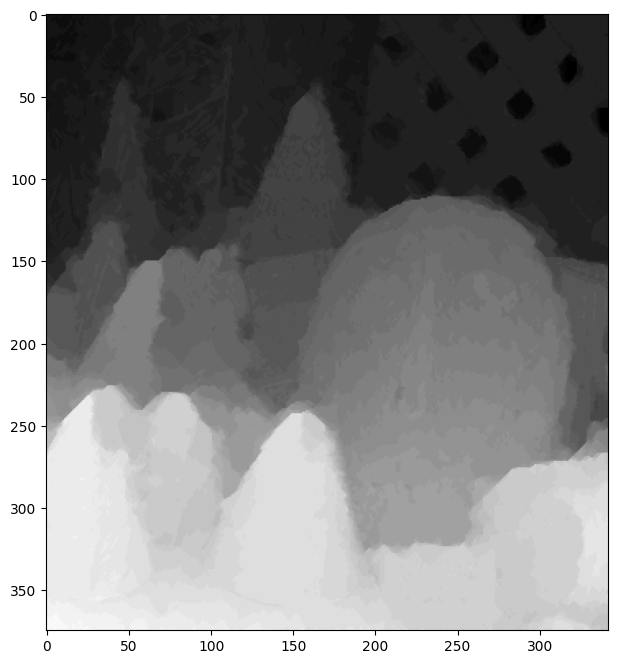

In [17]:
lmd = 4
labels = gcut(unary,depth,lmd)

plt.figure( figsize=(8,8) )
plt.imshow(labels,'gray')

## set the lambda as 5

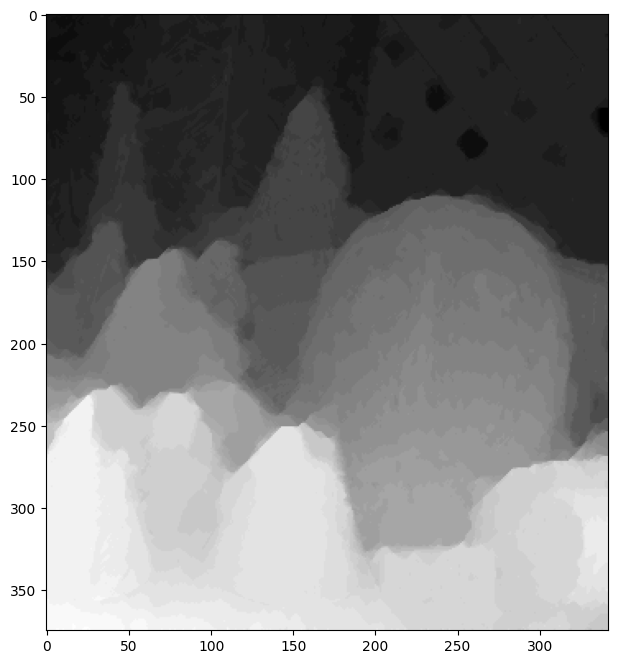

In [18]:
lmd = 5
labels = gcut(unary,depth,lmd)

plt.figure( figsize=(8,8) )
plt.imshow(labels,'gray')

## set the lambda as 10

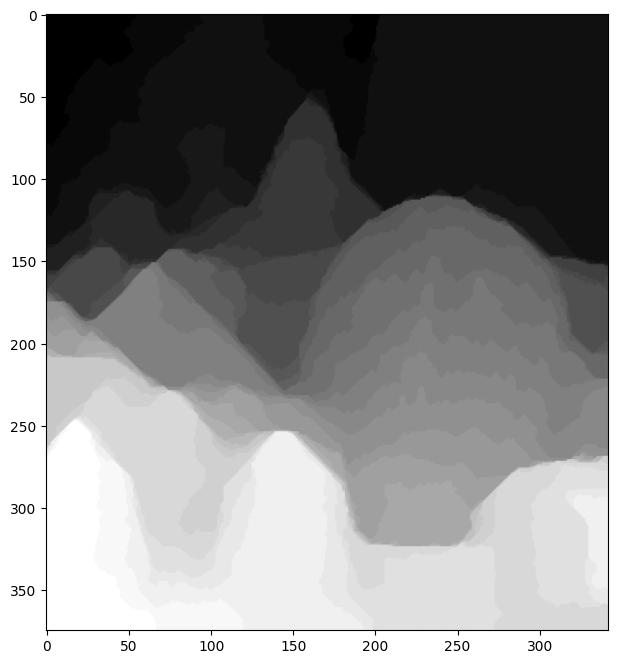

In [19]:
lmd = 10
labels = gcut(unary,depth,lmd)

plt.figure( figsize=(8,8) )
plt.imshow(labels,'gray')

# the best performance is when lambda equals to 0.1 and 3. if I set lambda close to 0, it will be noisy. If I set lambda larger, it will be very blur

### set the depth as a certain value: 10

In [20]:
Disparity = Ddistribution(im2,im1)
print(min(Disparity),max(Disparity))

unary,depth = nodes(im2,im1,Disparity,depth = 10)

4.0 56.0
dmin: 4.0 dmax 56.0


## set the lambda as 0.1

Text(0.5, 1.0, 'Depth map with lambda = 0.10')

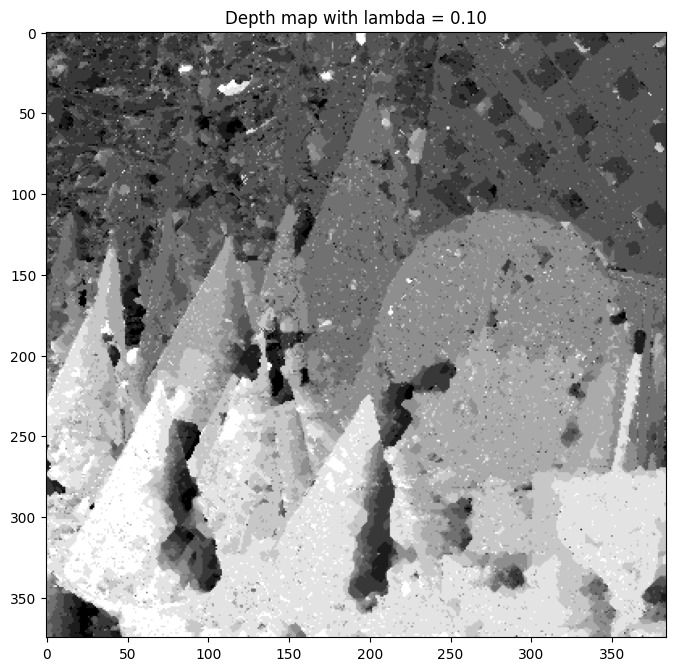

In [21]:
lmd = 0.1
labels = gcut(unary,depth,lmd)

plt.figure( figsize=(8,8) )
plt.imshow(labels,'gray')
plt.title('Depth map with lambda = %.2f'%lmd)

## set the lambda as 0.2

Text(0.5, 1.0, 'Depth map with lambda = 0.20')

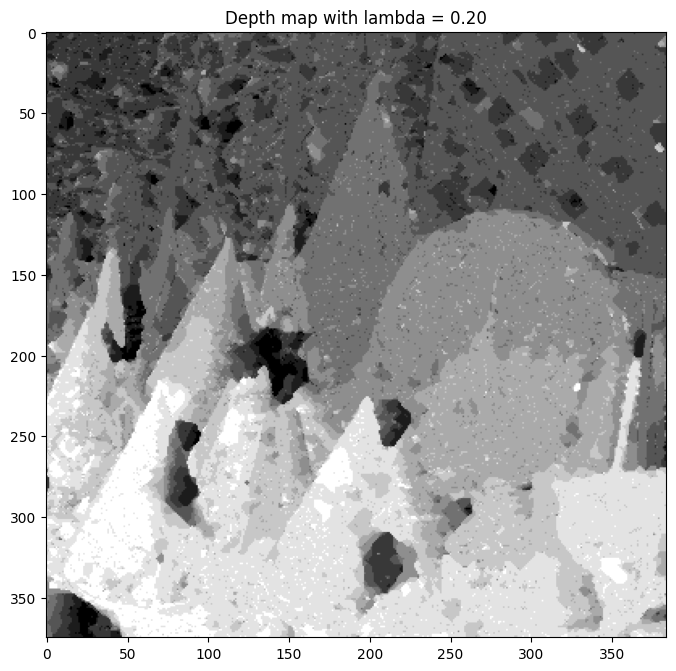

In [22]:
lmd = 0.2
labels = gcut(unary,depth,lmd)

plt.figure( figsize=(8,8) )
plt.imshow(labels,'gray')
plt.title('Depth map with lambda = %.2f'%lmd)

## set the lambda as 0.5

Text(0.5, 1.0, 'Depth map with lambda = 0.50')

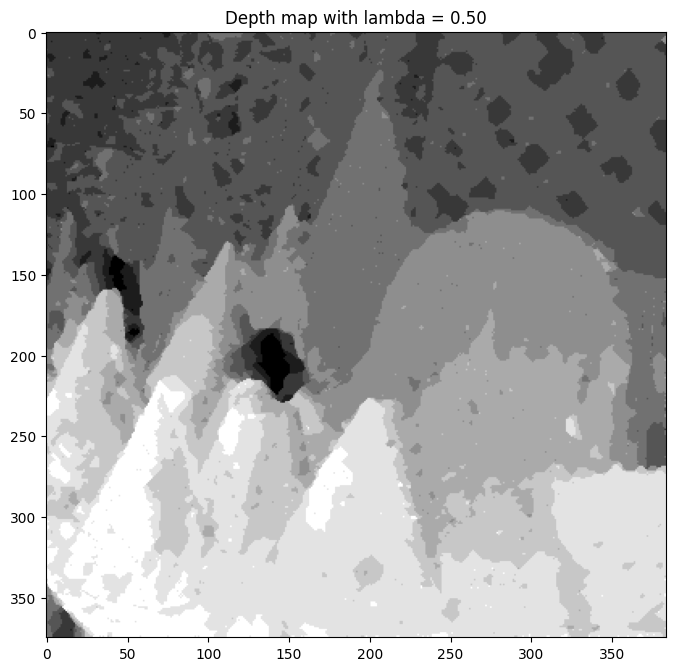

In [23]:
lmd = 0.5
labels = gcut(unary,depth,lmd)

plt.figure( figsize=(8,8) )
plt.imshow(labels,'gray')
plt.title('Depth map with lambda = %.2f'%lmd)

## set the lambda as 1

Text(0.5, 1.0, 'Depth map with lambda = 1.00')

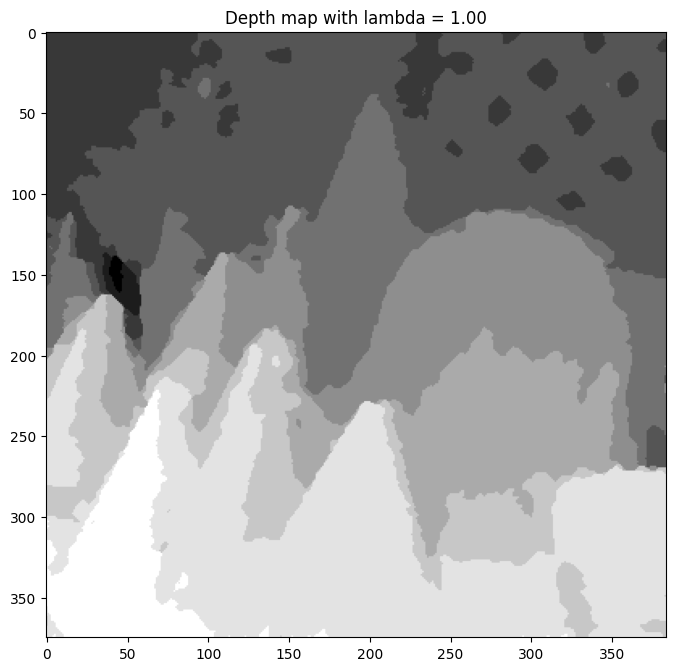

In [24]:
lmd = 1
labels = gcut(unary,depth,lmd)

plt.figure( figsize=(8,8) )
plt.imshow(labels,'gray')
plt.title('Depth map with lambda = %.2f'%lmd)

# Comparing the depth map with same lambda but different dpeth, the less depth level will reduce the noise in depth map when the dmin and dmax are unchanged.

# Meanwhile the lambda value is related to the value of data term and prior term. Actually, the ratio of lambda and average value of data term matters.